# Test detection in image
 

## Imports

In [58]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import re
from os.path import exists
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
import string


import letter_detection_utils as ld_util
import preprocessing as pp
import ressources as rss
import modele as mdl
import rendering as rd
import metric_orthograph as mo
import matplotlib.pyplot as plt


# initialisation des variables globales
rss.init()



In [54]:
# Pour recharger les libs pendant les devs
from importlib import reload 
reload(ld_util)
reload(pp)
reload(rss)
reload(mdl)
reload(rd)
reload(mo)

<module 'metric_orthograph' from 'd:\\GitHub\\OCRpyMAN\\notebooks\\metric_orthograph.py'>

# Code

## Text detection

In [60]:
form_img_path = '../data/formsA-D/a01-000u.png'
form_img = plt.imread(form_img_path)
img_size = (form_img.shape[0], form_img.shape[1])

doctr_bboxes = mdl.get_image_bounding_boxes(form_img_path)
bounding_boxes = mdl.format_bounding_boxes(doctr_bboxes, img_size)
bounding_boxes_xyhw = mdl.format_bounding_boxes_xyhw(doctr_bboxes, img_size)

2023-02-22 18:33:57.950 INFO    root: Using downloaded & verified file: /Users/jpec/.cache/doctr/models/db_resnet50-adcafc63.zip
2023-02-22 18:34:00.255 INFO    root: Using downloaded & verified file: /Users/jpec/.cache/doctr/models/crnn_vgg16_bn-76b7f2c6.zip


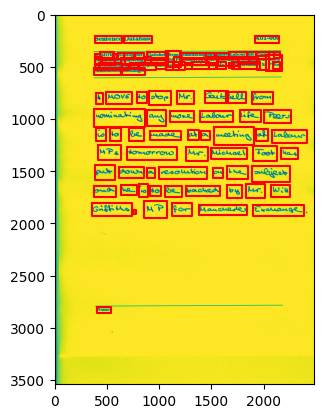

In [61]:
form_img = plt.imread(form_img_path)
size = form_img.shape[0], form_img.shape[1]
# plot_bounding_boxes_xyhw(bounding_boxes_xyhw)
mdl.plot_bounding_boxes(bounding_boxes)
plt.imshow(form_img)
plt.show()

### Test with cropping

In [62]:
img_path = '../data/formsA-D/a01-000u.png'
doctr_bboxes = mdl.get_image_bounding_boxes(img_path)
img_arr = mdl.load_image(img_path)
img_size = (img_arr.shape[0], img_arr.shape[1])

bounding_boxes = mdl.format_bounding_boxes(doctr_bboxes, (1,1))
bounding_boxes_xyhw = mdl.format_bounding_boxes_xyhw(doctr_bboxes, (1,1))

2023-02-22 18:34:10.850 INFO    root: Using downloaded & verified file: /Users/jpec/.cache/doctr/models/db_resnet50-adcafc63.zip
2023-02-22 18:34:12.104 INFO    root: Using downloaded & verified file: /Users/jpec/.cache/doctr/models/crnn_vgg16_bn-76b7f2c6.zip


In [63]:
def reorder_bounding_boxes_coords():
    return []
bboxes = [[0.7919921875, 0.162109375,0.0146484375, 0.0546875,]]
list(map(lambda bbox: [bbox[1], bbox[0], bbox[2], bbox[3]], bboxes))

[[0.162109375, 0.7919921875, 0.0146484375, 0.0546875]]

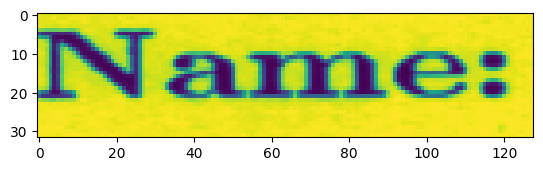

In [64]:
bboxes = [bounding_boxes[0]]
# bboxes = [bounding_boxes_xyhw[0]]
crops = tf.image.crop_and_resize(
    tf.expand_dims(img_arr, 0),
    boxes=list(map(lambda bbox: [bbox[1], bbox[0], bbox[3], bbox[2]], bboxes)),
    # boxes=bboxes,
    crop_size=[32, 128], # To resize the crop (32, 128)
    box_indices=list(range(len(bboxes)))
)

for crop in crops:
    plt.imshow(crop)
    plt.plot()

### Multiple

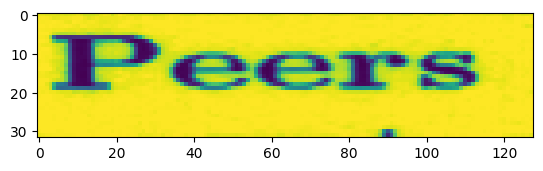

In [65]:
bboxes = bounding_boxes
crops = tf.image.crop_and_resize(
    tf.expand_dims(img_arr, 0),
    boxes=list(map(lambda bbox: [bbox[1], bbox[0], bbox[3], bbox[2]], bboxes)), # [y1, x1, y2, x2]
    crop_size=[32, 128], # To resize the crop img to (32, 128)
    box_indices=[0 for i in range(len(bboxes))] # We are always using the same img
)

# fig = plt.figure(figsize = (10,20))
# nb_figs = len(crops)
# for i in range(nb_figs):
#     fig.add_subplot(1,nb_figs, i+1)
#     plt.imshow(crops[i])
# plt.plot()

i=0
for crop in crops[0: len(crops) - 5]:
    i += 1
    if i < 3:
        continue
    plt.imshow(crop)
    plt.plot()